In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Prompt the user for input
user_main_symbol = input("Enter a stock symbol: ")

# Now you can use the 'user_symbol' variable in your subsequent code
print(f"User input: {user_main_symbol}")
import yfinance as yf
import pandas as pd

def extract_stock_data(symbol):
    try:
        stock = yf.Ticker(symbol)
        stock_data = stock.history(period="max")
        stock_data.to_csv(f"{symbol}_stock_data.csv")
        print(f"Stock data saved to {symbol}_stock_data.csv")
    except Exception as e:
        print(f"Error extracting data for symbol {symbol}: {e}")

if __name__ == "__main__":
    extract_stock_data(user_main_symbol)


Enter a stock symbol: IBM
User input: IBM
Stock data saved to IBM_stock_data.csv


In [ ]:
df = pd.read_csv(f"{user_main_symbol}_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02 00:00:00-05:00,1.559231,1.559231,1.541711,1.541711,407940,0.0,0.0
1,1962-01-03 00:00:00-05:00,1.541710,1.555187,1.541710,1.555187,305955,0.0,0.0
2,1962-01-04 00:00:00-05:00,1.555187,1.555187,1.539015,1.539689,274575,0.0,0.0
3,1962-01-05 00:00:00-05:00,1.537668,1.537668,1.506672,1.509367,384405,0.0,0.0
4,1962-01-08 00:00:00-05:00,1.508020,1.508020,1.468938,1.481067,572685,0.0,0.0


In [ ]:
from datetime import datetime
for i in range(len(df)):
    df['Date'][i]=datetime.strptime(str(df['Date'][i]).split(" ")[0],"%Y-%m-%d")

In [ ]:
df.shape

(15692, 8)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15692.000000,15692.000000,15692.000000,15692.000000,1.569200e+04,15692.000000,15692.000000
mean,39.189433,39.544595,38.852251,39.202369,5.087411e+06,0.006449,0.000959
std,43.830960,44.176959,43.501555,43.845820,4.608086e+06,0.081059,0.046860
min,0.825004,0.866793,0.808828,0.825004,0.000000e+00,0.000000,0.000000
25%,4.171235,4.193711,4.143666,4.171851,1.538038e+06,0.000000,0.000000
50%,11.962687,12.059757,11.857824,11.947647,4.305777e+06,0.000000,0.000000
75%,65.211742,66.008063,64.457467,65.208738,7.038874e+06,0.000000,0.000000
max,197.580002,199.179993,196.139999,197.779999,7.263916e+07,1.660000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15692 non-null  object 
 1   Open          15692 non-null  float64
 2   High          15692 non-null  float64
 3   Low           15692 non-null  float64
 4   Close         15692 non-null  float64
 5   Volume        15692 non-null  int64  
 6   Dividends     15692 non-null  float64
 7   Stock Splits  15692 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 980.9+ KB


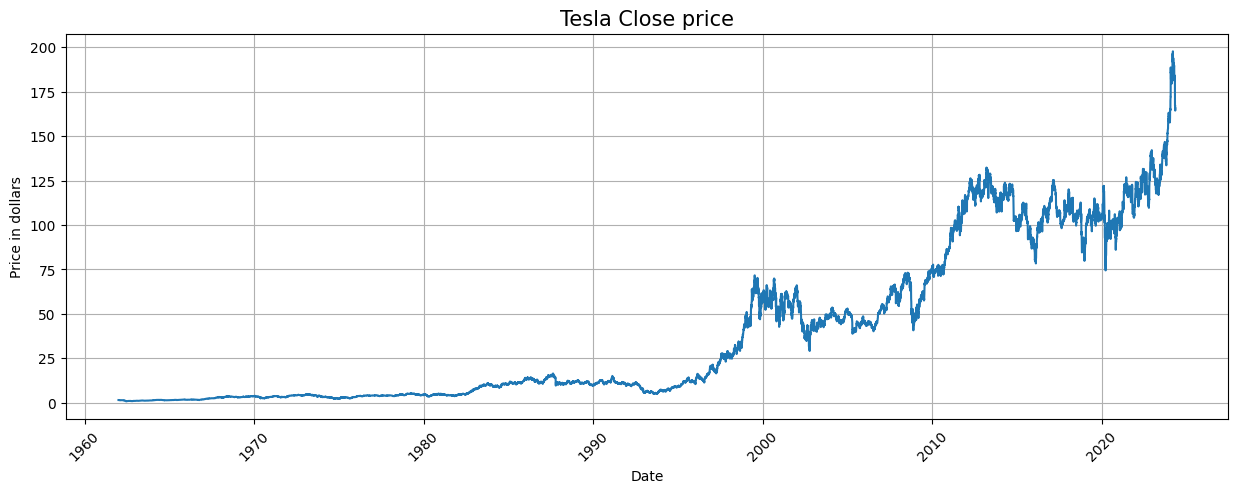

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'])  # Use 'Date' column for x-axis
plt.title('Tesla Close price', fontsize=15)
plt.xlabel('Date')  # Set x-axis label to 'Date'
plt.ylabel('Price in dollars')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better visualization
plt.show()

In [ ]:
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02 00:00:00,1.559231,1.559231,1.541711,1.541711,407940,0.0,0.0
1,1962-01-03 00:00:00,1.541710,1.555187,1.541710,1.555187,305955,0.0,0.0
2,1962-01-04 00:00:00,1.555187,1.555187,1.539015,1.539689,274575,0.0,0.0
3,1962-01-05 00:00:00,1.537668,1.537668,1.506672,1.509367,384405,0.0,0.0
4,1962-01-08 00:00:00,1.508020,1.508020,1.468938,1.481067,572685,0.0,0.0


In [ ]:
df.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

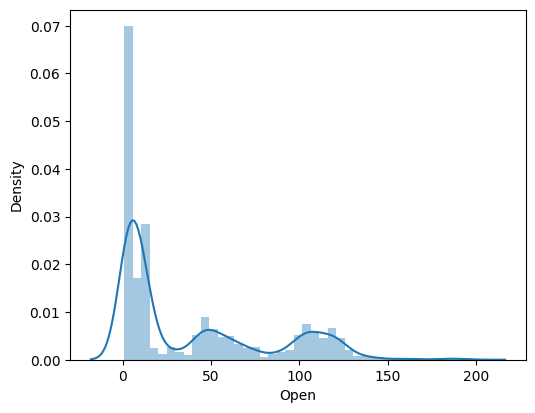

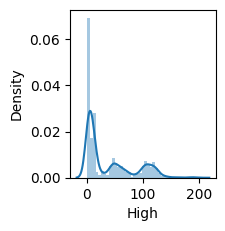

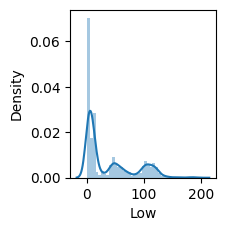

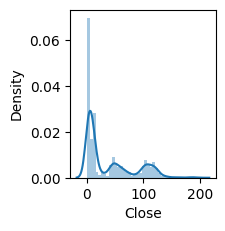

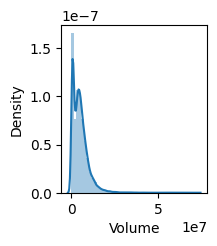

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()


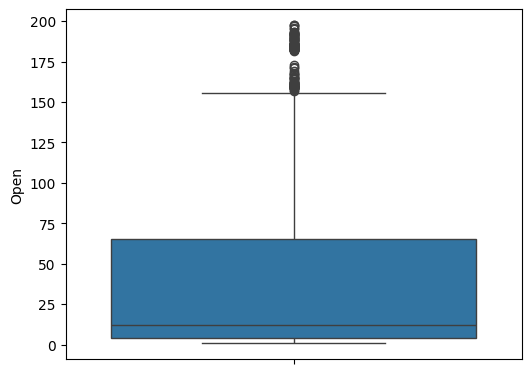

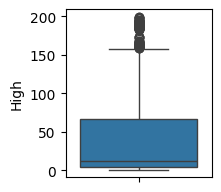

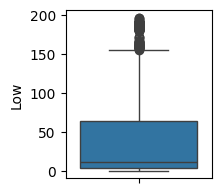

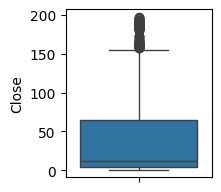

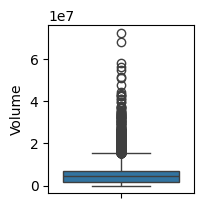

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()


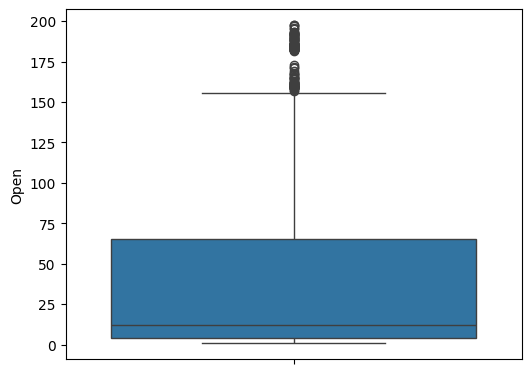

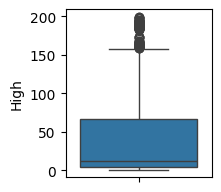

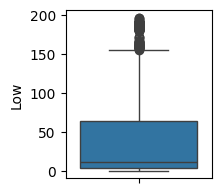

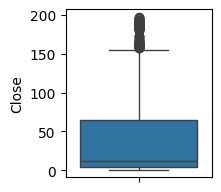

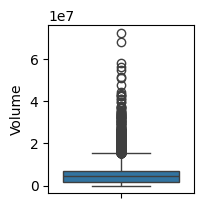

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,is_quarter_end
0,1962-01-02,1.559231,1.559231,1.541711,1.541711,407940,0.0,0.0,1962,1,2,0
1,1962-01-03,1.541710,1.555187,1.541710,1.555187,305955,0.0,0.0,1962,1,3,0
2,1962-01-04,1.555187,1.555187,1.539015,1.539689,274575,0.0,0.0,1962,1,4,0
3,1962-01-05,1.537668,1.537668,1.506672,1.509367,384405,0.0,0.0,1962,1,5,0
4,1962-01-08,1.508020,1.508020,1.468938,1.481067,572685,0.0,0.0,1962,1,8,0


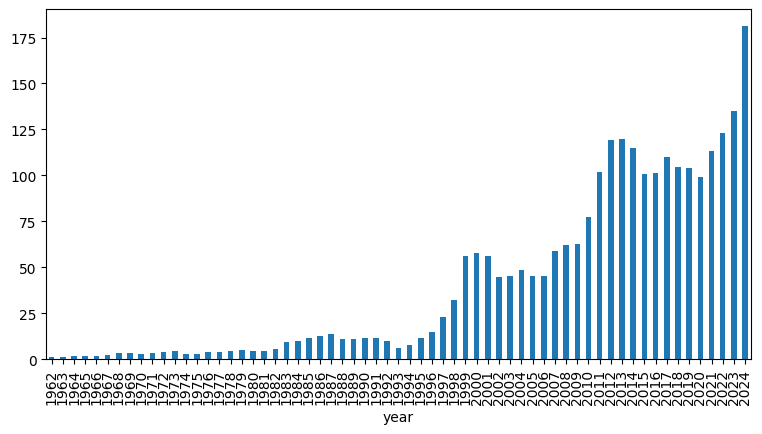

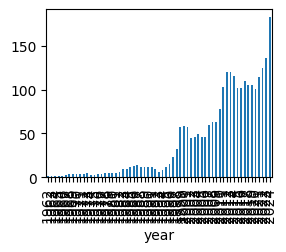

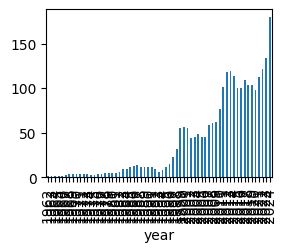

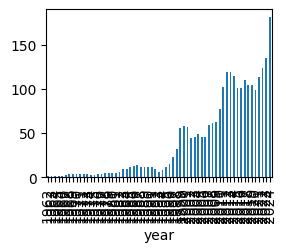

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()


In [ ]:
df.groupby('is_quarter_end').mean()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
is_quarter_end,,,,,,,,,,,
0,1993-03-01 06:58:30.595454976,39.161726,39.516036,38.819728,39.178582,5.192833e+06,0.009703,0.001059,1992.704382,6.045067,15.729217
1,1993-03-31 19:42:48.497054976,39.244337,39.601186,38.916698,39.249505,4.878511e+06,0.000000,0.000760,1992.673950,7.419913,15.747102


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


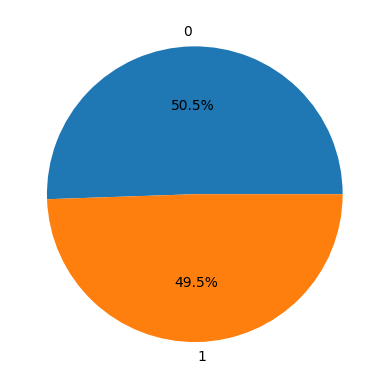

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


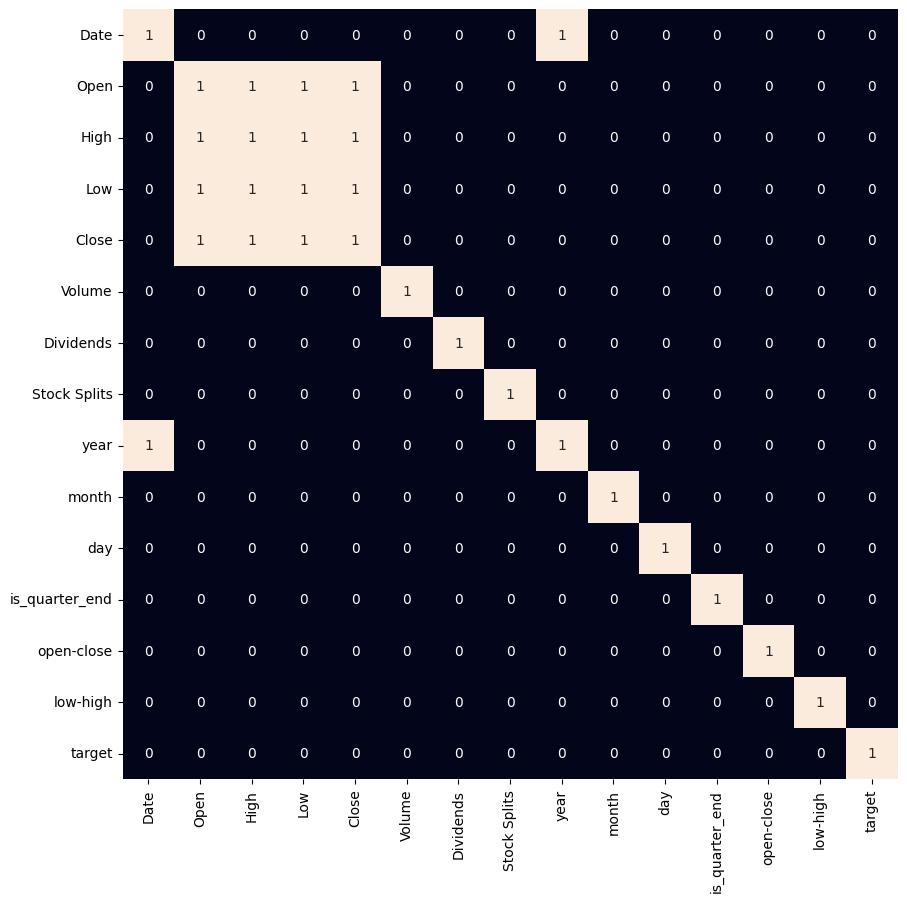

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(14122, 3) (1570, 3)


In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5218050211253196
Validation Accuracy :  0.5198952479818828

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5208914764451684
Validation Accuracy :  0.5398384206618807

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

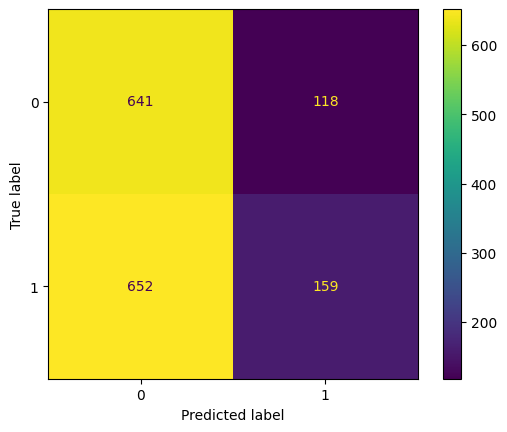

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

# Assuming models[0] is your trained model, X_valid is your validation data, and Y_valid are the true labels
ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()


**LSTM**

10 epoch loss 0.01475721
20 epoch loss 0.012319323
30 epoch loss 0.009204153
40 epoch loss 0.0016908307
50 epoch loss 0.0001764694
60 epoch loss 0.00038321104
70 epoch loss 0.0001909121
80 epoch loss 9.633578e-05
90 epoch loss 5.582046e-05


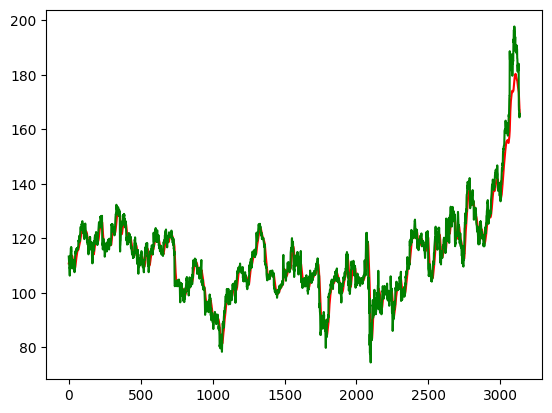

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

closed_prices = df["Close"]

seq_len = 15

mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

X = []
y = []

for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i + seq_len])
    y.append(scaled_price[i + seq_len])

X = np.array(X)[... , None]
y = np.array(y)[... , None]

train_x = torch.from_numpy(X[:int(0.8 * X.shape[0])]).float()
train_y = torch.from_numpy(y[:int(0.8 * X.shape[0])]).float()
test_x = torch.from_numpy(X[int(0.8 * X.shape[0]):]).float()
test_y = torch.from_numpy(y[int(0.8 * X.shape[0]):]).float()

class Model(nn.Module):
    def __init__(self , input_size , hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size , batch_first = True)
        self.fc = nn.Linear(hidden_size , 1)
    def forward(self , x):
        output , (hidden , cell) = self.lstm(x)
        return self.fc(hidden[-1 , :])
model = Model(1 , 64)

optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
loss_fn = nn.MSELoss()

num_epochs = 100

for epoch in range(num_epochs):
    output = model(train_x)
    loss = loss_fn(output , train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 and epoch != 0:
        print(epoch , "epoch loss" , loss.detach().numpy())

model.eval()
with torch.no_grad():
    output = model(test_x)

pred = mm.inverse_transform(output.numpy())
real = mm.inverse_transform(test_y.numpy())

plt.plot(pred.squeeze() , color = "red" , label = "predicted")
plt.plot(real.squeeze() , color = "green" , label = "real")
plt.show()






### **MACD**

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
high_prices = df.loc[:,'High'].values
low_prices = df.loc[:,'Low'].values
mid_prices = (high_prices+low_prices)/2.0

In [ ]:
split_index = int(len(mid_prices) * 0.75)

# Split the data into training and testing sets
train_data = mid_prices[:split_index]
test_data = mid_prices[split_index:]

In [ ]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
smoothing_window_size = 2500
num_iterations = len(train_data) // smoothing_window_size

for i in range(num_iterations):
    start_index = i * smoothing_window_size
    end_index = min((i + 1) * smoothing_window_size, len(train_data))
    scaler.fit(train_data[start_index:end_index])
    train_data[start_index:end_index] = scaler.transform(train_data[start_index:end_index])


In [ ]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)


In [ ]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
  # Initialize EMA with the first value of train_data

for ti in range(len(train_data)):
    EMA = gamma * train_data[ti] + (1 - gamma) * EMA
    train_data[ti] = EMA
all_mid_data = np.concatenate([train_data,test_data],axis=0)


In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(df['Date'])

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for EMA averaging: 0.02773


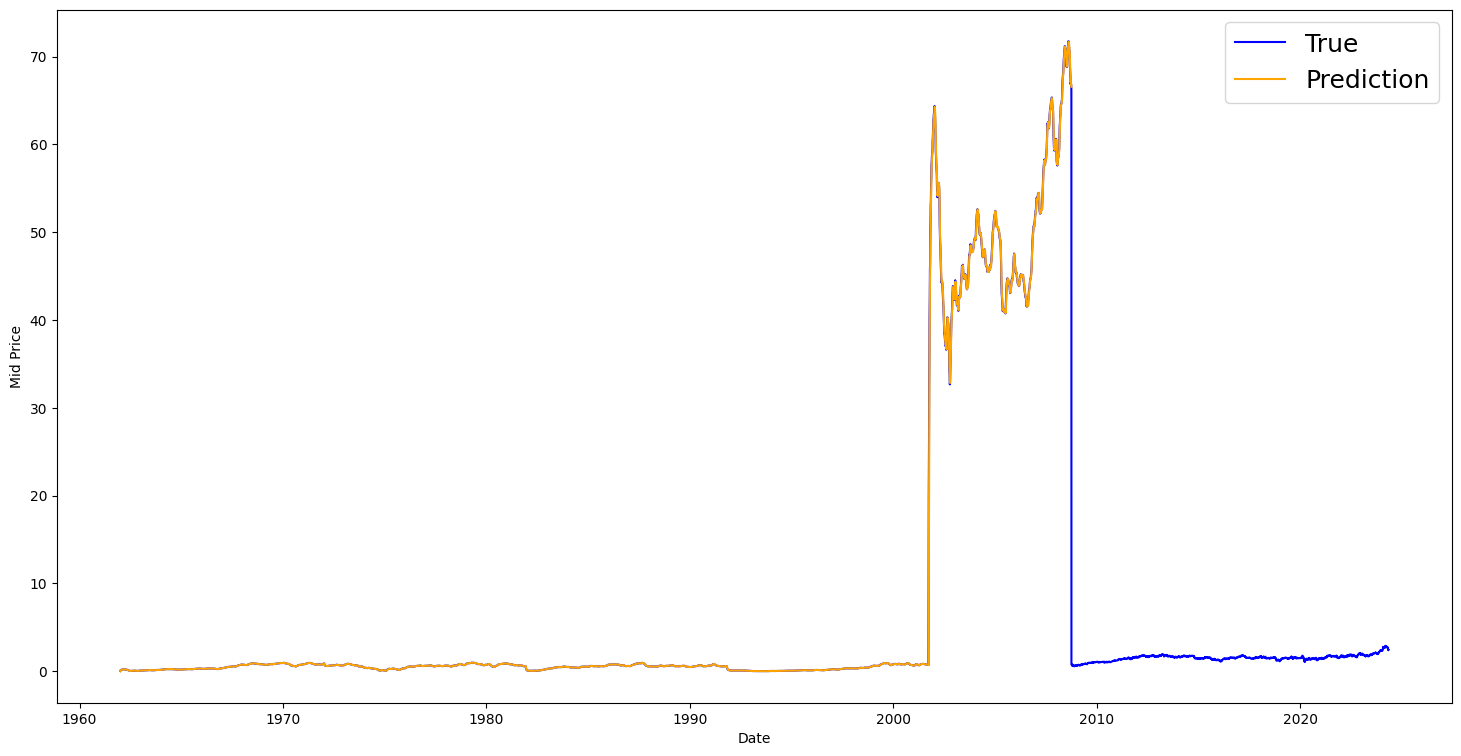

In [ ]:
plt.figure(figsize=(18, 9))
plt.plot(df['Date'], all_mid_data, color='b', label='True')
plt.plot(df['Date'][:N], run_avg_predictions, color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()